<h2><center>Starter Code for Starship Detection</center></h2>

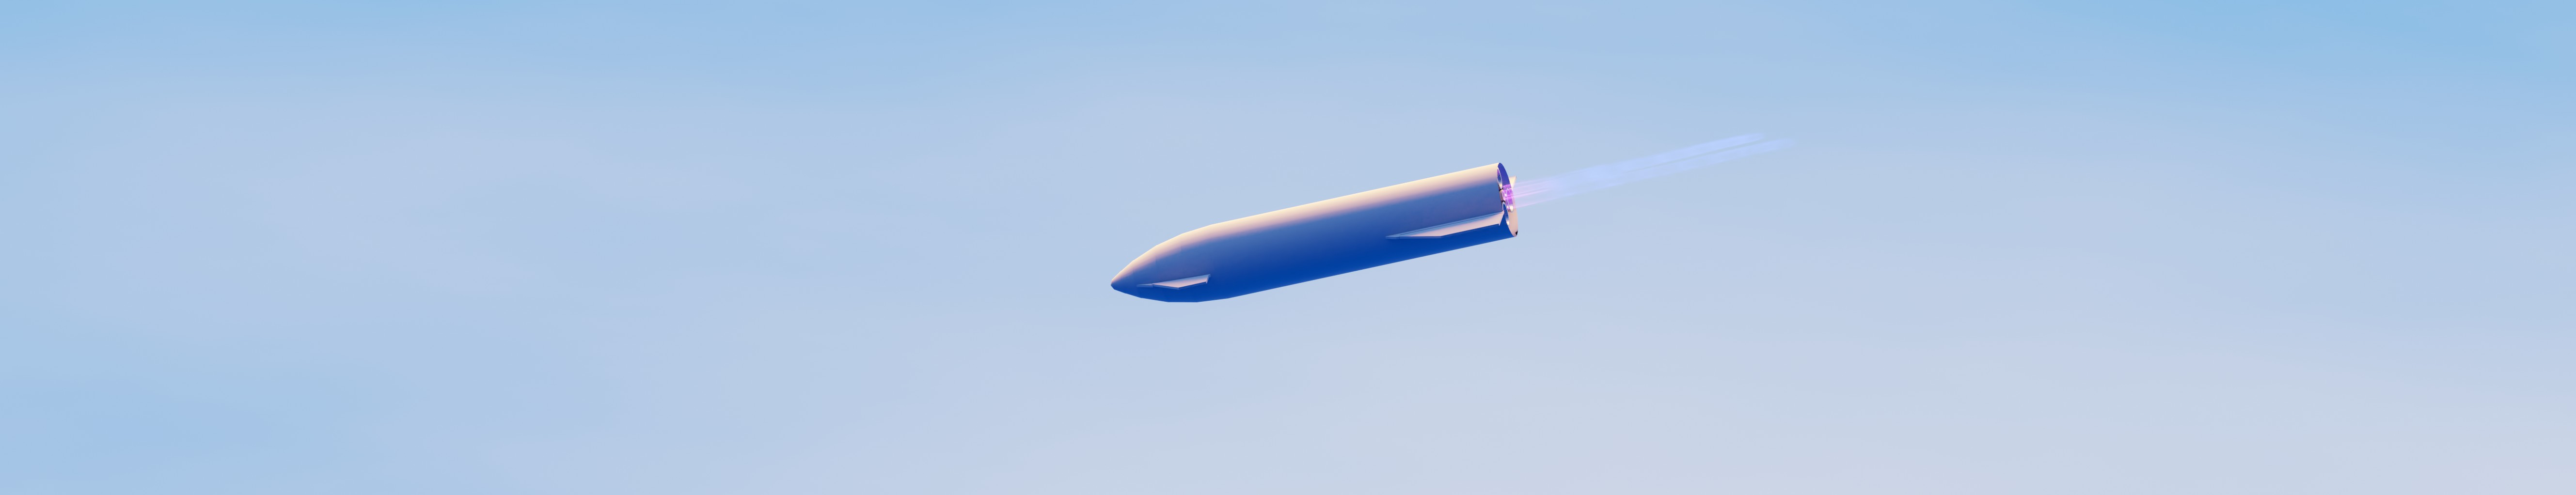

### What we are going to Learn

  - Basic Image Preprocessing with OpenCV 
  - Fixing Contours on an image and getting bounding boxes.  
  - Testing and Submitting the Results to the Challenge. 

**Note : Create a copy of the notebook and use the copy for submission. Go to *File > Save a Copy in Drive* to create a new copy**

# Setting up Environment

### Downloading Dataset

So we will first need to download the python library by AIcrowd that will allow us to download the dataset by just inputting the API key. 

In [ ]:
!pip install aicrowd-cli

%load_ext aicrowd.magic

     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 174kB 19.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 215kB 12.7MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.26.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
%aicrowd login

In [ ]:
# Downloading the Dataset
!rm -rf data
!mkdir data
%aicrowd ds dl -c starship-detection -o data

data.zip: 100% 34.1M/34.1M [00:02<00:00, 13.3MB/s]


In [ ]:
!unzip data/data.zip -d /content/images >> /dev/null

# Importing Libraries

In [ ]:
# Image Reading & Preprocessing
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Misc.
import pandas as pd
from tqdm.notebook import tqdm
import os
from natsort import natsorted

# Image Preprocessing

In this section we are going to learn some opencv functions which can help us detecting the starship body!

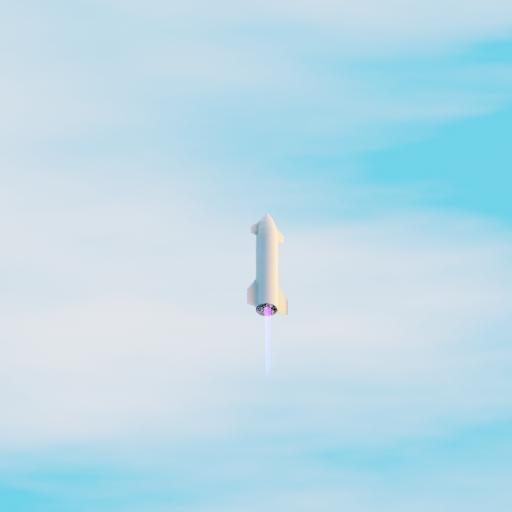

In [ ]:
# Reading a Sample Image
img = Image.open("images/2.jpg")
img

In [ ]:
# Converting the image to numpy array 
np_img = np.array(img)
np_img.shape

(512, 512, 3)

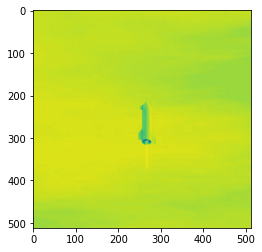

In [ ]:
# Converting the Image to RGB to Grayscale ( black/white )
gray = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

### `cv2.Canny`

Now `cv2.Canny` is Canny Edge Detection which helps us to detect edges in the image. Let's try it our on the starship 

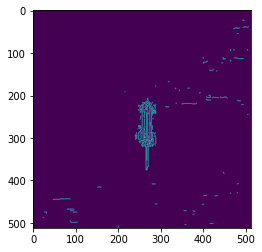

In [ ]:
canny = cv2.Canny(gray, 10, 15)
plt.imshow(canny)

So as you can see the function detected multiple edges including the starship boly and some noise too, there are many ways to reduce that noise, however you can try changing the parameters in the function and see where that leads. 

### Countours

Contours are lines joining along the bounding of a intensity or color in an image. In the canny image or the original image, we see that the starship has much different color as compared to the sky. 

In [ ]:
# Finding contours in the image
contours, hierarchy = cv2.findContours(canny, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
# Sorting the contours in ascending order
contours = sorted(contours, key=cv2.contourArea)

In [ ]:
# Getting the bounding boxes of the biggest contours
x,y,w,h = list(cv2.boundingRect(contours[-1]))
x,y,w,h

(246, 215, 26, 106)

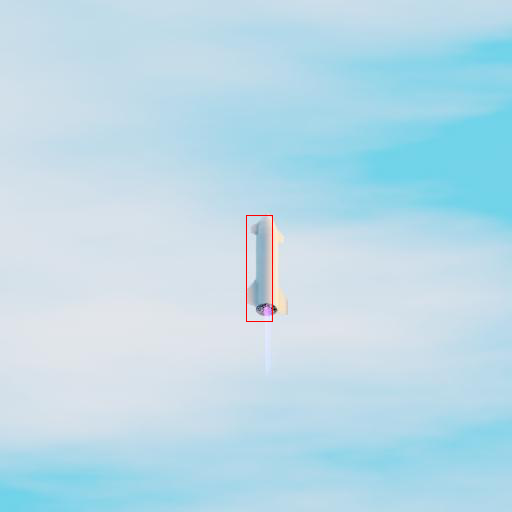

In [ ]:
# Showing the contour
draw_img = img.copy()
draw = ImageDraw.Draw(draw_img)
draw.rectangle([x, y, x+w, y+h], outline ="red")
draw_img

So as you can see, fnding contours did a pretty great job in finfing the starship body. However there are some mistakes with the image in such as the more right side of the starship body in left unchecked.

# Submitting Results 📄

In [ ]:
# Getting all the testing images 
test_imgs = natsorted(os.listdir("images"))
print(len(test_imgs))

10000


In [ ]:
# Function to generate the bounding boxes
def gen_bounding_boxes(img):

  # Converting the image to numpy array 
  img = np.array(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Getting the edges
  canny = cv2.Canny(gray, 100, 150)

  # Getting the contours
  contours, hierarchy = cv2.findContours(canny, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # Sorting the contours
  contours = sorted(contours, key=cv2.contourArea)

  try:
    # Return the boundong boxes of the biggest contour
    x,y,w,h = list(cv2.boundingRect(contours[-1]))
  
  # Incase no countous found
  except:
    x,y,w,h = [1, 1, 1, 1]

  return x,y,w,h

In [ ]:
bboxes = []
image_ids = []

# Ground through each test image
for img_name in tqdm(test_imgs):

  # Reading the test image
  img = Image.open(os.path.join("images", img_name))

  # Generating the bounding boxes
  x,y,w,h = gen_bounding_boxes(img)

  # Adding the boundong boxes and image id
  bboxes.append([x,y,w,h])
  image_ids.append(int(img_name.split(".")[0]))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
# Adding the image id and bounding boxes to a dataframe
df = pd.DataFrame({"ImageID":image_ids, "bbox":bboxes})
df = df.sort_values("ImageID").reset_index(drop=True)
df

ImageID                 bbox
0           0     [180, 304, 7, 9]
1           1  [273, 228, 128, 42]
2           2   [246, 231, 26, 85]
3           3  [204, 243, 168, 33]
4           4    [346, 301, 9, 17]
...       ...                  ...
9995     9995  [191, 240, 196, 18]
9996     9996   [180, 245, 71, 21]
9997     9997   [96, 212, 207, 76]
9998     9998   [157, 242, 24, 77]
9999     9999    [170, 323, 17, 5]

[10000 rows x 2 columns]

In [ ]:
!rm -rf assets
!mkdir assets

df.to_csv(os.path.join("assets", "submission.csv"), index=False)

**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

## Uploading the Results

In [ ]:
!aicrowd notebook submit -c starship-detection -a assets --no-verify

Mounting Google Drive 💾
Your Google Drive will be mounted to access the colab notebook
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhFvIAGCFinUFlvMmREfLHx8lzK_pqq3XjRe0jg27nUUq4p7oiQ_BQ
Mounted at /content/drive
Using notebook: /content/drive/MyDrive/Colab Notebooks/Starship Detection for submission...
Scrubbing API keys from the notebook...
s